# Rays from a Resistive Bolometer

This notebook shows how rays generated from Resistive Bolometers (RBs) propagate through plasma.


In [1]:
from itertools import cycle

from plotly import graph_objects as go
from plotly import io as pio
from raysect.core import World
from raysect.optical.ray import Ray
from raysect.primitive import Mesh

from cherab.lhd.machine import load_pfc_mesh
from cherab.lhd.observer.bolometer import load_resistive
from cherab.lhd.tools.fetch import fetch_file

# Comment out the following line to view the plot interactively
pio.renderers.default = "jpg"

## Create scene graph


Firstly, let us create root node of officials, called `world`.


In [2]:
world = World()

In [3]:
pfcs = load_pfc_mesh(world, reflection=False)

Output()

Load plasma volume


In [4]:
plasma = Mesh.from_file(fetch_file("machine/plasma_quarter.rsm"), name="plasma")

And, we will load one resistive bolometer.


In [5]:
rb = load_resistive(port="6.5L", model_variant="O", parent=world)

## Show rays from RBs with plasma


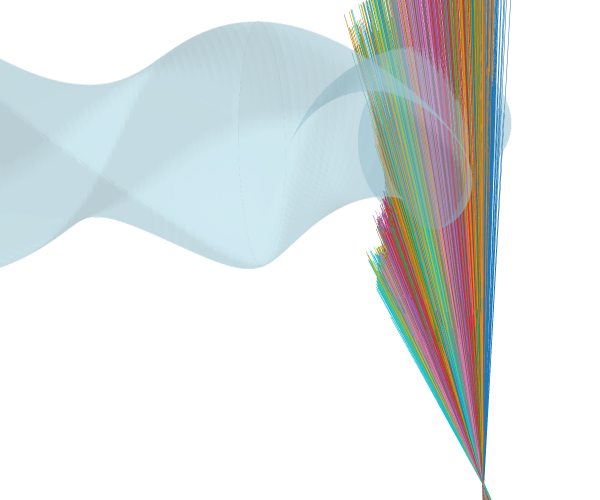

In [6]:
fig = go.Figure()

# ---------------
# === RB rays ===
# ---------------
color_cycle = cycle(
    [
        "#1f77b4",
        "#ff7f0e",
        "#2ca02c",
        "#d62728",
        "#9467bd",
        "#8c564b",
        "#e377c2",
        "#7f7f7f",
        "#bcbd22",
        "#17becf",
    ]
)
for foil, color in zip(rb.foil_detectors, color_cycle, strict=False):
    for ray in foil._generate_rays(Ray(), 100):
        origin = ray[0].origin.transform(foil.to_root())
        origin_0 = origin.copy()
        direction = ray[0].direction.transform(foil.to_root())

        while True:
            # Find intersection
            intersection = world.hit(Ray(origin, direction))

            if intersection is not None:
                if "slit" in intersection.primitive.name:
                    hit_point = intersection.hit_point.transform(intersection.primitive_to_world)
                    ray_displacement = foil.x_width / 100
                    origin = hit_point + direction * ray_displacement
                    continue
                else:
                    hit_point = intersection.hit_point.transform(intersection.primitive_to_world)
                    break

            else:
                hit_point = ray[0].point_on(6).transform(foil.to_root())
                break

        x0, y0, z0 = origin_0
        x1, y1, z1 = hit_point
        fig.add_trace(
            go.Scatter3d(
                x=[x0, x1],
                y=[y0, y1],
                z=[z0, z1],
                mode="lines",
                line=dict(color=color, width=1),
                showlegend=False,
                # hoverinfo="skip",
            )
        )
# ---------------------
# === Plasma volume ===
# ---------------------
x, y, z = plasma.data.vertices.T
index_i, index_j, index_k = plasma.data.triangles.T
plasma_mesh = go.Mesh3d(
    x=x,
    y=y,
    z=z,
    i=index_i,
    j=index_j,
    k=index_k,
    flatshading=False,
    color="#ADD8E6",  # Light blue color
    opacity=0.2,
    name="Plasma",
    showscale=False,
    hoverinfo="skip",
    showlegend=True,
)
fig.add_trace(plasma_mesh)

# Update visibility
fig.update_scenes(
    xaxis_visible=False,
    yaxis_visible=False,
    zaxis_visible=False,
)
camera = dict(
    up=dict(x=0, y=0, z=1),
    center=dict(x=0, y=0, z=-0.125),
    eye=dict(x=-1.0, y=-0.15, z=0.1),
)
fig.update_layout(
    width=600,
    height=500,
    scene_camera=camera,
    showlegend=False,
    scene_aspectmode="data",
    margin=dict(r=0, l=0, b=0, t=0),
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
)
fig.show(renderer="png")

Export the figure to a image file


In [7]:
# fig.write_image("bolo_rb_rays1.pdf", scale=3)
# fig.write_image("bolo_rb_rays1.png", scale=1)

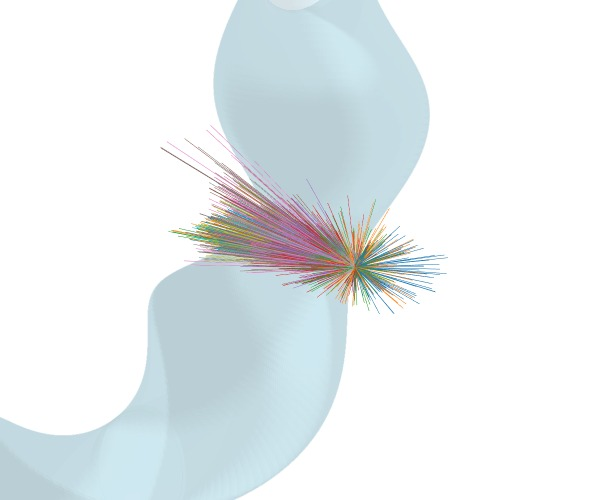

In [8]:
fig = go.Figure()

# ---------------
# === RB rays ===
# ---------------
color_cycle = cycle(
    [
        "#1f77b4",
        "#ff7f0e",
        "#2ca02c",
        "#d62728",
        "#9467bd",
        "#8c564b",
        "#e377c2",
        "#7f7f7f",
        "#bcbd22",
        "#17becf",
    ]
)
for foil, color in zip(rb.foil_detectors, color_cycle, strict=False):
    for ray in foil._generate_rays(Ray(), 100):
        origin = ray[0].origin.transform(foil.to_root())
        origin_0 = origin.copy()
        direction = ray[0].direction.transform(foil.to_root())

        while True:
            # Find intersection
            intersection = world.hit(Ray(origin, direction))

            if intersection is not None:
                if "slit" in intersection.primitive.name:
                    hit_point = intersection.hit_point.transform(intersection.primitive_to_world)
                    ray_displacement = foil.x_width / 100
                    origin = hit_point + direction * ray_displacement
                    continue
                else:
                    hit_point = intersection.hit_point.transform(intersection.primitive_to_world)
                    break

            else:
                hit_point = ray[0].point_on(6).transform(foil.to_root())
                break

        x0, y0, z0 = origin_0
        x1, y1, z1 = hit_point
        fig.add_trace(
            go.Scatter3d(
                x=[x0, x1],
                y=[y0, y1],
                z=[z0, z1],
                mode="lines",
                line=dict(color=color, width=1),
                showlegend=False,
                # hoverinfo="skip",
            )
        )
# ---------------------
# === Plasma volume ===
# ---------------------
x, y, z = plasma.data.vertices.T
index_i, index_j, index_k = plasma.data.triangles.T
plasma_mesh = go.Mesh3d(
    x=x,
    y=y,
    z=z,
    i=index_i,
    j=index_j,
    k=index_k,
    flatshading=False,
    color="#ADD8E6",  # Light blue color
    opacity=0.2,
    name="Plasma",
    showscale=False,
    hoverinfo="skip",
    showlegend=True,
)
fig.add_trace(plasma_mesh)

# Update visibility
fig.update_scenes(
    xaxis_visible=False,
    yaxis_visible=False,
    zaxis_visible=False,
)
camera = dict(
    up=dict(x=0, y=0, z=1),
    center=dict(x=0.05, y=-0.2, z=0),
    eye=dict(x=0.05, y=-0.2, z=0.9),
)
fig.update_layout(
    width=600,
    height=500,
    scene_camera=camera,
    showlegend=False,
    scene_aspectmode="data",
    margin=dict(r=0, l=0, b=0, t=0),
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
)

In [9]:
# fig.write_image("bolo_rb_rays2.pdf", scale=3)